# 9. Закрепление знаний
[SkillFactory Link](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/courseware/adcad86c8b6c4e1299c49876a3024181/8bd0c0f84e0844d4a884df20d4a6d9f1/2?activate_block_id=block-v1%3ASkillFactory%2BDSPR-2.0%2B14JULY2021%2Btype%40vertical%2Bblock%401fa00a018157484a9bae5d4557ef3e7c)

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [23]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/keloin/SF/main/python-13-churn-analysis/data/churn.csv')
churn_data.drop('RowNumber', axis=1, inplace=True)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## ЗАДАНИЯ

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

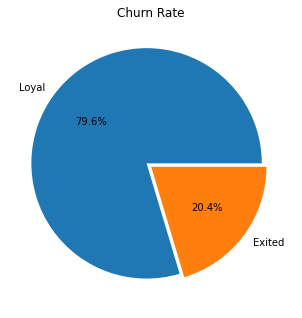

In [25]:
chart_data = churn_data.groupby('Exited', as_index=False)['CustomerId'].count()

fig = plt.figure(figsize=(4, 4))
fig.set_facecolor('white')

axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    chart_data['CustomerId'],
    labels=['Loyal', 'Exited'],
    autopct='%.1f%%',
    explode = [0.05, 0],
);
axes.set_title('Churn Rate')
display()

Анализ показывает, что чуть более 20% клиентов покинуло банк за рассматриваемый период (то есть, у примерно 20% клиентов параметр Exited был равен 1). К сожалению, мы не знаем за какой период были предоставлены данные. В течение одного года 20% – это, быть может, и много. Если же рассматривать на протяжении более длительного срока, 20% ушедших клиентов может и не быть проблемой. 

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

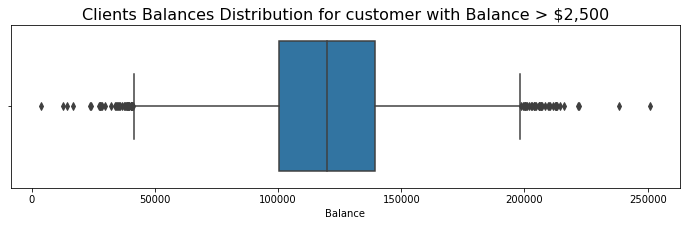

In [26]:
chart_data = churn_data[ churn_data['Balance'] > 2500 ]

# For some reason px.box does not work in google colab for me.. 
# chart = px.box(
#     data_frame=chart_data,
#     x='Balance',
#     title='Client Balance Distribution'
# )
# chart.show()

fig = plt.figure(figsize=(12, 3))
fig.set_facecolor('white')

boxplot = sns.boxplot(data=chart_data, x='Balance')
boxplot.set_title('Clients Balances Distribution for customer with Balance > $2,500', fontsize=16)

display()

Выше предоставлена диаграмма, которая показывает, что у большинства клиентов банковский баланс находится между 100К и 140К долларов. Быть может, это и есть основная фокусная группа данного банка и клиенты с меньшим (или большим) балансом не рассматриваются серьёзно сотрудниками банка.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

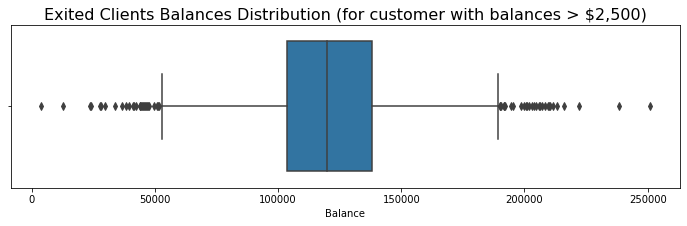

In [27]:
chart_data = churn_data[ (churn_data['Exited'] == 1) & (churn_data['Balance'] > 2500) ]
# chart = px.box(
#     data_frame=chart_data,
#     x='Balance',
#     title='Exited Clients Balance Distribution'
# )
# chart.show()

fig = plt.figure(figsize=(12, 3))
fig.set_facecolor('white')

boxplot = sns.boxplot(data=chart_data, x='Balance')
boxplot.set_title('Exited Clients Balances Distribution (for customer with balances > $2,500)', fontsize=16)

display()

Однако мы видим, что и среди ушедших клиетов банковский баланс имеет похожее распределение. Так что, скорее всего, дело не в размере баланса.

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

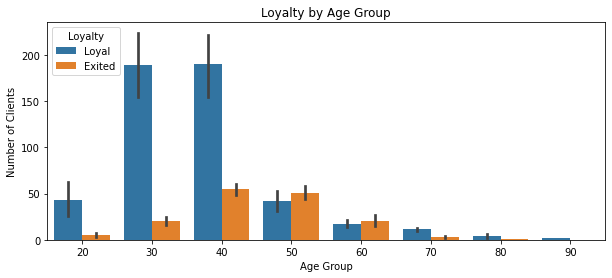

In [28]:

analysis_by_age = churn_data[ (churn_data['Balance'] > 2500) ].groupby(['Age', 'Exited'], as_index=False)['CustomerId'].count()
analysis_by_age['Age Group'] = analysis_by_age['Age'].apply(lambda x: int(round(x/10))*10) 
analysis_by_age['Loyalty'] = analysis_by_age['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')
# analysis_by_age

fig = plt.figure(figsize=(10, 4))
fig.set_facecolor('white')

chart = sns.barplot(
    data=analysis_by_age,
    x='Age Group',
    y='CustomerId',
    hue='Loyalty',
)
chart.set_title("Loyalty by Age Group")
chart.set_ylabel("Number of Clients")

display()

Из диаграммы выше мы можем видеть, что большинство клиентов, которые покинули банк были в возрасте между 40 и 50 лет, в то время как оставшиеся клиенты в своём большинстве находятся в возрасте между 30 и 40 годами. Причём молодых клиентов сильно больше чем клиентов больше 40 лет. Быть может, банку стоит обратить внимание на их политику общения с другим, более мудрым 😉 поколением?

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

19

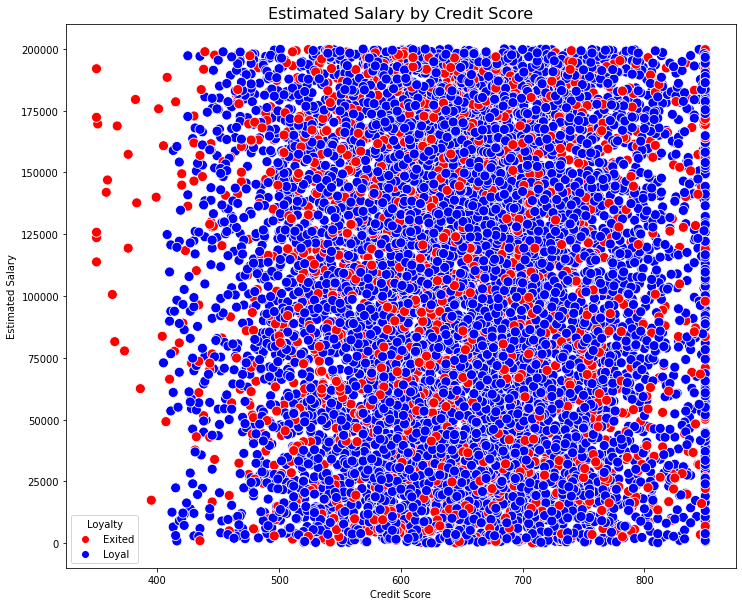

In [29]:
churn_data['Age Group'] = churn_data['Age'].apply(lambda x: int(round(x/10))*10) 
churn_data['Loyalty'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')

color_dict = {'Loyal': 'green', 'Exited': 'red'}

fig = plt.figure(figsize=(12, 10))
fig.set_facecolor('white')

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Loyalty',
    s=100,
    palette={'Loyal': 'blue', 'Exited': 'red'},
    legend='full'
)
scatterplot.set_title('Estimated Salary by Credit Score', fontsize=16)
scatterplot.set_xlabel('Credit Score')
scatterplot.set_ylabel('Estimated Salary')

display(churn_data[ (churn_data['Loyalty'] == 'Exited') & (churn_data['CreditScore'] <= 400)]['CustomerId'].count())

Удивительным образом, не наблюдается никакой зависимости размера зарплаты от кредитной истории. Однако! Однако мы чётко видим, что клиенты с низкой кредитной историей покинули банк (хоть их было и не так много). Быть может, это такая политика банка? Попытка избавиться от клиентов с низким рейтингом вне зависимости от зарплаты. Нет ни одного клиента у этого банка с кредитным рейтингом ниже 400. И те 19 клиентов что были, этот банк покинули.

Также можно наблюдать, что есть огромное количество клиентов с максимальным кредитным рейтингом. Что может быть ошибкой данных. Надо будет об этом подумать в будущем.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.



,Gender,Exited
0,Female,1139
1,Male,898


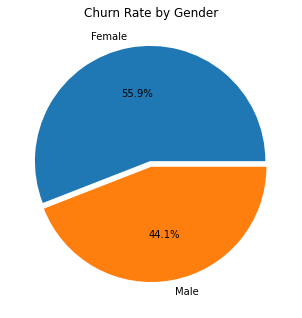

In [30]:
churn_by_gender = churn_data[ churn_data['Exited'] == 1 ].groupby('Gender', as_index=False)['Exited'].sum()
display(churn_by_gender)

# chart = px.pie(
#     data_frame=churn_by_gender,
#     title='Churn Rate by Gender', 
#     values='Exited',
#     names='Gender',
#     hole=.4,
#     height=400,
#     width=400
# )
# chart.show()

fig = plt.figure(figsize=(4, 4))
fig.set_facecolor('white')

axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_by_gender['Exited'],
    labels=churn_by_gender['Gender'],
    autopct='%.1f%%',
    explode = [0.05, 0]
);
axes.set_title('Churn Rate by Gender')
display()

Мужчины покидают банк немного реже, чем женщины, но разница в данном случае небольшая. Вряд ли здесь есть какая-либо зависимость.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

,NumOfProducts,Exited,Loyalty,CustomerId
0,1,0,Loyal,3675
1,1,1,Exited,1409
2,2,0,Loyal,4242
3,2,1,Exited,348
4,3,0,Loyal,46
5,3,1,Exited,220
6,4,1,Exited,60


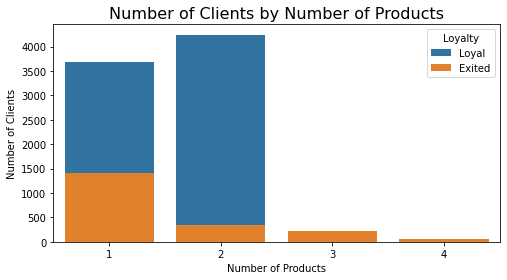

In [31]:
churn_by_num_of_products = churn_data.groupby(['NumOfProducts', 'Exited', 'Loyalty'], as_index=False)[['CustomerId']].count()

fig = plt.figure(figsize=(8, 4))
fig.set_facecolor('white')

barplot2 = sns.barplot(
    data=churn_by_num_of_products,
    x='NumOfProducts',
    y='CustomerId',
    hue='Loyalty',
    orient='v',
    dodge=False
)
barplot2.set_title('Number of Clients by Number of Products', fontsize=16)
barplot2.set_xlabel('Number of Products')
barplot2.set_ylabel('Number of Clients')

display(churn_by_num_of_products)

Большинство лояльных клиентов наслаждается одним или двумя услугами банка. Похоже, что некоторое количество покинувших банк клиентов (около 300) было недовольно качеством дополнительных(?) услуг.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

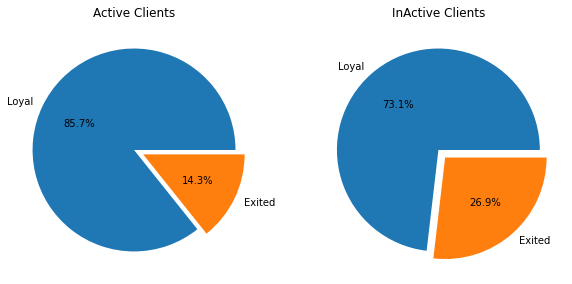

In [32]:
churn_by_active = churn_data.groupby(['IsActiveMember', 'Exited', 'Loyalty'], as_index=False)['CustomerId'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.set_facecolor('white')

axes[0].set_title('Active Clients')
axes[1].set_title('InActive Clients')

axes[0].pie(
    x=churn_by_active[ churn_by_active['IsActiveMember'] == 1]['CustomerId'],
    autopct='%.1f%%',
    labels=churn_by_active[ churn_by_active['IsActiveMember'] == 1]['Loyalty'],
    explode=[0,.1],
)

axes[1].pie(
    x=churn_by_active[ churn_by_active['IsActiveMember'] == 0]['CustomerId'],
    autopct='%.1f%%',
    labels=churn_by_active[ churn_by_active['IsActiveMember'] == 0]['Loyalty'],
    explode=[0,.1],
)

display()

После оценки активности клиентов мы можем чётко видеть, что неактивные клиенты уходили из банка примерно в два раза чаще чем активные. Можно посоветовать банку вовлекать клиентов более активно.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [33]:
choropleth_data = churn_data[ churn_data['Exited']==1 ].groupby(['Geography'], as_index=False)['CustomerId'].count()
choropleth_data['# of Exited'] = choropleth_data['CustomerId']

geography_analysis = churn_data.pivot_table(index='Geography', values=['Exited'], aggfunc='mean')
geography_analysis['Geography'] = geography_analysis.index
geography_analysis['Exited'] = round(100*geography_analysis['Exited'], 1)
geography_analysis.index.name = None

fig = px.choropleth(
    data_frame=geography_analysis, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    title='Number of exited customers', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()
# fig.show(renderer='notebook')

Легко наблюдать, что доля ушедших клиентов в Германии в 2 раза больше, чем средних процент уходящих клиентов. В принципе, быть может, в банке нет сотрудников, которые могут говорить по-немецки? 

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.


In [34]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [35]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Loyalty,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,Exited,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,Loyal,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40,Exited,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,40,Loyal,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40,Loyal,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,40,Loyal,Good
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,40,Loyal,Poor
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,40,Exited,Good
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,40,Exited,Good


In [36]:
heatmap_data = churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack().round(2)
heatmap_data.index.name = "Credit Rating"
# heatmap_data

chart = px.imshow(
    heatmap_data,
    title="Exited customers depending on Tenure and Credit Rating",
    color_continuous_scale='Reds'
)
chart.show()

В принципе, как и ожидалось, количество ушедших клиентов зависит от того, как долго клиент был с банком, и какой у клиента рейтинг. Клиенты, которые были с банком недолго и у которых кредитный рейтинг плохой, уходят из банка почти с 50% вероятностью.